In [885]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from sklearn import tree
import pandas_datareader.data as web
import math
import xlsxwriter
import string
import nltk
from nltk.tokenize import MWETokenizer  #import tokenizer
nltk.download('stopwords')  #download the list of stopwords, if you have not already done so
from nltk.corpus import stopwords  #import the list of stopwords
from nltk.stem.snowball import SnowballStemmer  #import stemmer module
import pandas as pd
import ta
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xiaoming/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [918]:
zoom=pd.read_csv('/Users/xiaoming/computational/ZM_clean.csv')

In [919]:
zoom.head()

,date,time,tweet
0,2020-04-25,16:37:25,Happy to report these puts went to 0 and I did...
1,2020-04-25,16:36:41,Actual footage of me trying to get rid of my b...
2,2020-04-25,16:35:03,Most active options Friday- $AAPL $INTC $BYND ...
3,2020-04-25,16:34:15,$KR chart taking advantage of the situation an...
4,2020-04-25,16:33:05,"Icahn says stocks are overvalued... $ZM, $CODX..."


In [910]:
def negation_handling (text):
    negatereg1=re.compile(r'n’t \S*')
    negatereg2=re.compile(r'no \S*')
    negatereg3=re.compile(r'not \S*')
    
    negate_list1=negatereg1.findall(i)
    negate_list2=negatereg2.findall(i)
    negate_list3=negatereg3.findall(i)
    negate_list = negate_list1 + negate_list2 + negate_list3

    text1 = re.sub(negatereg1,'', text) 
    text2 = re.sub(negatereg2,'', text1) 
    text3 = re.sub(negatereg3,'', text2) 
    
    return text3, negate_list

In [911]:
def clean_tokenize (text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    text_nonum = text_nonum.replace('”', '')
    text_nonum = text_nonum.replace('“', '')
    text_nonum = text_nonum.replace('—', ' ')
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace. Also, removes leading and trailing whitespaces
    text_cleaned = re.sub('\s+', ' ', text_nopunct).strip()
    text_output = tokenizer.tokenize(text_cleaned.split())
    text_stopwords = []
    for word in text_output:
        if word not in stopwords.words('english'):  #filter the stop words
            text_stopwords.append(word) 
    text_stemmed = ([stemmer.stem(w) for w in text_stopwords])
    return text_stemmed
stemmer = SnowballStemmer('english')

In [912]:
df1 = pd.read_excel('/Users/xiaoming/Desktop/computational FIN/LM Sentiment Dictionary.xlsx', sheet_name='Positive') # if using spyder 3.7+, change sheetname to sheet_name
positive_temp = df1['WORD'].tolist()
positive = [item.lower() for item in positive_temp]
positive_stemmed = ([stemmer.stem(w) for w in positive])
positive_negate = []
for word in positive_stemmed:
    positive_negate.append('n’t '+ word)
    positive_negate.append('no '+ word)
    positive_negate.append('not '+ word)

df2 = pd.read_excel('/Users/xiaoming/Desktop/computational FIN/LM Sentiment Dictionary.xlsx', sheet_name='Negative') # if using spyder 3.7+, change sheetname to sheet_name
negative_temp = df2['WORD'].tolist()
negative = [item.lower() for item in negative_temp]
negative_stemmed = ([stemmer.stem(w) for w in negative])
negative_negate = []
for word in negative_stemmed:
    negative_negate.append('n’t '+ word)
    negative_negate.append('no '+ word)
    negative_negate.append('not '+ word)

positive_final = positive_stemmed + negative_negate
negative_final = negative_stemmed + positive_negate
stemmer = SnowballStemmer('english')
tokenizer = MWETokenizer([('new', 'york'), ('san', 'francisco')])

In [913]:
abc=[]
for i in zoom['tweet']:
    
    docu_negate, nlist = negation_handling(i)
    nlist_stemmed = ([stemmer.stem(w) for w in nlist])
    docu_tokens = clean_tokenize(docu_negate) 
    docufinal = docu_tokens + nlist_stemmed
    doculen = len(docufinal)
    docu_positive = ([w for w in docufinal if w in positive_final])
    docu_negative = ([w for w in docufinal if w in negative_final])
    docu_sentiment = (len(docu_positive)-len(docu_negative))/doculen
    abc.append(docu_sentiment)

In [920]:
abc=pd.DataFrame(abc)
abc

,0
0,0.125000
1,-0.023810
2,0.000000
3,0.000000
4,-0.100000
...,...
36203,-0.125000
36204,-0.083333
36205,0.000000
36206,0.000000


In [921]:
zoom = pd.concat([zoom, abc],axis=1)
zoom.columns.values[-1]='score'
zoom

,date,time,tweet,score
0,2020-04-25,16:37:25,Happy to report these puts went to 0 and I did...,0.125000
1,2020-04-25,16:36:41,Actual footage of me trying to get rid of my b...,-0.023810
2,2020-04-25,16:35:03,Most active options Friday- $AAPL $INTC $BYND ...,0.000000
3,2020-04-25,16:34:15,$KR chart taking advantage of the situation an...,0.000000
4,2020-04-25,16:33:05,"Icahn says stocks are overvalued... $ZM, $CODX...",-0.100000
...,...,...,...,...
36203,2019-07-01,07:26:32,$ZM - Zoom Video -3% as Goldman questions valu...,-0.125000
36204,2019-07-01,07:13:03,GS downgraded $ZM trend line is 85.70 area t...,-0.083333
36205,2019-07-01,07:07:50,$ZM isn't downing much. $88.....,0.000000
36206,2019-07-01,05:50:22,$ZM #15ORB. 😁👍 https://twitter.com/theflynews/...,0.000000


In [922]:
zoom=zoom[zoom['score'] != 0]

,date,time,tweet,score
36201,2019-07-01,07:35:34,$ZM didn't show up today - down 4% on Goldman ...,-0.166667
36202,2019-07-01,07:26:57,Zoom Video Downgraded To Sell From Neutral At ...,-0.076923
36203,2019-07-01,07:26:32,$ZM - Zoom Video -3% as Goldman questions valu...,-0.125000
36204,2019-07-01,07:13:03,GS downgraded $ZM trend line is 85.70 area t...,-0.083333
36207,2019-07-01,05:02:04,Zoom Video downgraded to Sell from Neutral at ...,-0.090909


In [923]:
zoom_mean=(zoom.groupby(zoom.date).mean())

zoom_mean.index.name='Date'
zoom_mean

,score
Date,
2019-07-01,-0.052642
2019-07-02,-0.036970
2019-07-03,-0.061251
2019-07-04,0.011222
2019-07-05,0.015686
...,...
2020-04-21,-0.029387
2020-04-22,-0.013261
2020-04-23,-0.011844


In [924]:
start = dt.datetime(2019, 7, 1)
end =  dt.datetime(2020, 4, 25) #dt.datetime.now() 

zoom_price = web.DataReader('ZM', 'yahoo', start, end)
zoom_price=pd.DataFrame(zoom_price)
zoom_price

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,87.790001,83.099998,85.129997,86.860001,5326800,86.860001
2019-07-02,86.849998,84.000000,86.269997,85.129997,1866000,85.129997
2019-07-03,90.599998,84.510002,85.449997,90.449997,2706100,90.449997
2019-07-05,91.970001,88.000000,90.139999,91.879997,2582700,91.879997
2019-07-08,92.790001,89.889999,91.440002,90.760002,1793300,90.760002
...,...,...,...,...,...,...
2020-04-20,155.000000,148.253998,153.300003,148.990005,11218700,148.990005
2020-04-21,154.750000,138.360001,151.419998,143.270004,9709100,143.270004
2020-04-22,152.279999,145.100006,147.100006,150.250000,6552800,150.250000


In [925]:
ADI=ta.volume.AccDistIndexIndicator(high=zoom_price['High'], low=zoom_price['Low'], close=zoom_price['Close'], volume=zoom_price['Volume'])
zoom_price['ADI']=ADI.acc_dist_index()
zoom_price

,High,Low,Open,Close,Volume,Adj Close,ADI
Date,,,,,,,
2019-07-01,87.790001,83.099998,85.129997,86.860001,5326800,86.860001,3.214253e+06
2019-07-02,86.849998,84.000000,86.269997,85.129997,1866000,85.129997,2.827955e+06
2019-07-03,90.599998,84.510002,85.449997,90.449997,2706100,90.449997,5.400748e+06
2019-07-05,91.970001,88.000000,90.139999,91.879997,2582700,91.879997,7.866344e+06
2019-07-08,92.790001,89.889999,91.440002,90.760002,1793300,90.760002,7.149026e+06
...,...,...,...,...,...,...,...
2020-04-20,155.000000,148.253998,153.300003,148.990005,11218700,148.990005,7.933929e+07
2020-04-21,154.750000,138.360001,151.419998,143.270004,9709100,143.270004,7.544736e+07
2020-04-22,152.279999,145.100006,147.100006,150.250000,6552800,150.250000,7.829481e+07


In [927]:
CMF=ta.volume.ChaikinMoneyFlowIndicator(high=zoom_price['High'], low=zoom_price['Low'], close=zoom_price['Close'], volume=zoom_price['Volume'])
zoom_price['CMF']=CMF.chaikin_money_flow() 
zoom_price

,High,Low,Open,Close,Volume,Adj Close,ADI,CMF
Date,,,,,,,,
2019-07-01,87.790001,83.099998,85.129997,86.860001,5326800,86.860001,3.214253e+06,0.603412
2019-07-02,86.849998,84.000000,86.269997,85.129997,1866000,85.129997,2.827955e+06,0.393165
2019-07-03,90.599998,84.510002,85.449997,90.449997,2706100,90.449997,5.400748e+06,0.545591
2019-07-05,91.970001,88.000000,90.139999,91.879997,2582700,91.879997,7.866344e+06,0.630235
2019-07-08,92.790001,89.889999,91.440002,90.760002,1793300,90.760002,7.149026e+06,0.500811
...,...,...,...,...,...,...,...,...
2020-04-20,155.000000,148.253998,153.300003,148.990005,11218700,148.990005,7.933929e+07,0.057603
2020-04-21,154.750000,138.360001,151.419998,143.270004,9709100,143.270004,7.544736e+07,-0.005709
2020-04-22,152.279999,145.100006,147.100006,150.250000,6552800,150.250000,7.829481e+07,0.069817


In [928]:
OBV=ta.volume.OnBalanceVolumeIndicator(close=zoom_price['Close'], volume=zoom_price['Volume'])
zoom_price['OBV']=OBV.on_balance_volume() 
zoom_price

,High,Low,Open,Close,Volume,Adj Close,ADI,CMF,OBV
Date,,,,,,,,,
2019-07-01,87.790001,83.099998,85.129997,86.860001,5326800,86.860001,3.214253e+06,0.603412,5326800
2019-07-02,86.849998,84.000000,86.269997,85.129997,1866000,85.129997,2.827955e+06,0.393165,3460800
2019-07-03,90.599998,84.510002,85.449997,90.449997,2706100,90.449997,5.400748e+06,0.545591,6166900
2019-07-05,91.970001,88.000000,90.139999,91.879997,2582700,91.879997,7.866344e+06,0.630235,8749600
2019-07-08,92.790001,89.889999,91.440002,90.760002,1793300,90.760002,7.149026e+06,0.500811,6956300
...,...,...,...,...,...,...,...,...,...
2020-04-20,155.000000,148.253998,153.300003,148.990005,11218700,148.990005,7.933929e+07,0.057603,97114000
2020-04-21,154.750000,138.360001,151.419998,143.270004,9709100,143.270004,7.544736e+07,-0.005709,87404900
2020-04-22,152.279999,145.100006,147.100006,150.250000,6552800,150.250000,7.829481e+07,0.069817,93957700


In [929]:
ROC=ta.momentum.ROCIndicator(close=zoom_price['Close'], n=1)
zoom_price['ROC']=ROC.roc() 
zoom_price

,High,Low,Open,Close,Volume,Adj Close,ADI,CMF,OBV,ROC
Date,,,,,,,,,,
2019-07-01,87.790001,83.099998,85.129997,86.860001,5326800,86.860001,3.214253e+06,0.603412,5326800,NaN
2019-07-02,86.849998,84.000000,86.269997,85.129997,1866000,85.129997,2.827955e+06,0.393165,3460800,-1.991715
2019-07-03,90.599998,84.510002,85.449997,90.449997,2706100,90.449997,5.400748e+06,0.545591,6166900,6.249266
2019-07-05,91.970001,88.000000,90.139999,91.879997,2582700,91.879997,7.866344e+06,0.630235,8749600,1.580984
2019-07-08,92.790001,89.889999,91.440002,90.760002,1793300,90.760002,7.149026e+06,0.500811,6956300,-1.218976
...,...,...,...,...,...,...,...,...,...,...
2020-04-20,155.000000,148.253998,153.300003,148.990005,11218700,148.990005,7.933929e+07,0.057603,97114000,-0.713043
2020-04-21,154.750000,138.360001,151.419998,143.270004,9709100,143.270004,7.544736e+07,-0.005709,87404900,-3.839185
2020-04-22,152.279999,145.100006,147.100006,150.250000,6552800,150.250000,7.829481e+07,0.069817,93957700,4.871917


In [930]:
RSI = ta.momentum.RSIIndicator(close=zoom_price['Close'], n=4)
zoom_price['RSI']=RSI.rsi() 
zoom_price.iloc[0:2,-1]=0
zoom_price

,High,Low,Open,Close,Volume,Adj Close,ADI,CMF,OBV,ROC,RSI
Date,,,,,,,,,,,
2019-07-01,87.790001,83.099998,85.129997,86.860001,5326800,86.860001,3.214253e+06,0.603412,5326800,NaN,0.000000
2019-07-02,86.849998,84.000000,86.269997,85.129997,1866000,85.129997,2.827955e+06,0.393165,3460800,-1.991715,0.000000
2019-07-03,90.599998,84.510002,85.449997,90.449997,2706100,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866
2019-07-05,91.970001,88.000000,90.139999,91.879997,2582700,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546
2019-07-08,92.790001,89.889999,91.440002,90.760002,1793300,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,155.000000,148.253998,153.300003,148.990005,11218700,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123
2020-04-21,154.750000,138.360001,151.419998,143.270004,9709100,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065
2020-04-22,152.279999,145.100006,147.100006,150.250000,6552800,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057


In [931]:
WR=ta.momentum.WilliamsRIndicator(high=zoom_price['High'], low=zoom_price['Low'], close=zoom_price['Close'],lbp=1)
zoom_price['WR']=WR.wr()
zoom_price

,High,Low,Open,Close,Volume,Adj Close,ADI,CMF,OBV,ROC,RSI,WR
Date,,,,,,,,,,,,
2019-07-01,87.790001,83.099998,85.129997,86.860001,5326800,86.860001,3.214253e+06,0.603412,5326800,NaN,0.000000,-19.829420
2019-07-02,86.849998,84.000000,86.269997,85.129997,1866000,85.129997,2.827955e+06,0.393165,3460800,-1.991715,0.000000,-60.350952
2019-07-03,90.599998,84.510002,85.449997,90.449997,2706100,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081
2019-07-05,91.970001,88.000000,90.139999,91.879997,2582700,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102
2019-07-08,92.790001,89.889999,91.440002,90.760002,1793300,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,155.000000,148.253998,153.300003,148.990005,11218700,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721
2020-04-21,154.750000,138.360001,151.419998,143.270004,9709100,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686
2020-04-22,152.279999,145.100006,147.100006,150.250000,6552800,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992


In [932]:
FI=ta.volume.ForceIndexIndicator(close=zoom_price['Close'], volume=zoom_price['Volume'],n=1)
zoom_price['FI']=FI.force_index()
zoom_price

,High,Low,Open,Close,Volume,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI
Date,,,,,,,,,,,,,
2019-07-01,87.790001,83.099998,85.129997,86.860001,5326800,86.860001,3.214253e+06,0.603412,5326800,NaN,0.000000,-19.829420,NaN
2019-07-02,86.849998,84.000000,86.269997,85.129997,1866000,85.129997,2.827955e+06,0.393165,3460800,-1.991715,0.000000,-60.350952,-3.228186e+06
2019-07-03,90.599998,84.510002,85.449997,90.449997,2706100,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07
2019-07-05,91.970001,88.000000,90.139999,91.879997,2582700,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06
2019-07-08,92.790001,89.889999,91.440002,90.760002,1793300,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,155.000000,148.253998,153.300003,148.990005,11218700,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07
2020-04-21,154.750000,138.360001,151.419998,143.270004,9709100,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07
2020-04-22,152.279999,145.100006,147.100006,150.250000,6552800,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07


In [933]:
VPT=ta.volume.VolumePriceTrendIndicator(close=zoom_price['Close'], volume=zoom_price['Volume'])
zoom_price['VPT']=VPT.volume_price_trend() 
zoom_price

,High,Low,Open,Close,Volume,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT
Date,,,,,,,,,,,,,,
2019-07-01,87.790001,83.099998,85.129997,86.860001,5326800,86.860001,3.214253e+06,0.603412,5326800,NaN,0.000000,-19.829420,NaN,-1.562896e+05
2019-07-02,86.849998,84.000000,86.269997,85.129997,1866000,85.129997,2.827955e+06,0.393165,3460800,-1.991715,0.000000,-60.350952,-3.228186e+06,-2.295267e+05
2019-07-03,90.599998,84.510002,85.449997,90.449997,2706100,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05
2019-07-05,91.970001,88.000000,90.139999,91.879997,2582700,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05
2019-07-08,92.790001,89.889999,91.440002,90.760002,1793300,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,155.000000,148.253998,153.300003,148.990005,11218700,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04
2020-04-21,154.750000,138.360001,151.419998,143.270004,9709100,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05
2020-04-22,152.279999,145.100006,147.100006,150.250000,6552800,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04


In [934]:
zoom_price=zoom_price.drop(columns=['High','Low','Open','Close','Volume'], axis=1)
zoom_price

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT
Date,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,NaN,0.000000,-19.829420,NaN,-1.562896e+05
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,0.000000,-60.350952,-3.228186e+06,-2.295267e+05
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04
...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04


In [935]:
zoom_new = pd.merge(zoom_price, zoom_mean, left_index=True, right_index=True)
zoom_new

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score
Date,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,NaN,0.000000,-19.829420,NaN,-1.562896e+05,-0.052642
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,0.000000,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183
...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261


In [936]:
zoom_new['ROC'][zoom_new['ROC'].isnull()]=np.mean(zoom_new['ROC'])
zoom_new

/Users/xiaoming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score
Date,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,0.000000,-19.829420,NaN,-1.562896e+05,-0.052642
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,0.000000,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183
...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261


In [937]:
zoom_new['FI'][zoom_new['FI'].isnull()]=np.mean(zoom_new['FI'])
zoom_new

/Users/xiaoming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score
Date,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,0.000000,-19.829420,3.079672e+06,-1.562896e+05,-0.052642
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,0.000000,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183
...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261


In [938]:
zoom_new.loc[0:2,'RSI']=np.mean(zoom_new['RSI'])
zoom_new

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score
Date,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,53.116401,-19.829420,3.079672e+06,-1.562896e+05,-0.052642
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,53.116401,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183
...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261


In [939]:
zoom_new['log return']=np.log(zoom_new['Adj Close']/zoom_new['Adj Close'].shift(1))
zoom_new['log return'][zoom_new['log return'].isnull()]=np.mean(zoom_new['log return'])
zoom_new['signal']=1
for i in range(len(zoom_new['log return'])-1):
    if zoom_new.iloc[i,-2]>0:
        zoom_new.iloc[i+1,-1]=1
    else:
        zoom_new.iloc[i+1,-1]=-1
zoom_new['position']=0
for i in range(len(zoom_new.loc[:,'log return'])-1):
    if zoom_new.iloc[i,-3] > 0:
        if zoom_new.iloc[i,-1] != 1:
            zoom_new.iloc[i+1,-1]=zoom_new.iloc[i,-1]+1
        else:
            zoom_new.iloc[i+1,-1]=zoom_new.iloc[i,-1]
    else:
        if zoom_new.iloc[i,-1] != -1:
            zoom_new.iloc[i+1,-1]=zoom_new.iloc[i,-1]-1
        else:
            zoom_new.iloc[i+1,-1]=zoom_new.iloc[i,-1]
zoom_new
        

/Users/xiaoming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score,log return,signal,position
Date,,,,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,53.116401,-19.829420,3.079672e+06,-1.562896e+05,-0.052642,0.002929,1,0
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,53.116401,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970,-0.020118,1,1
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251,0.060618,-1,0
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686,0.015686,1,1
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183,-0.012265,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740,-0.007156,-1,-1
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387,-0.039148,-1,-1
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261,0.047570,-1,-1


In [695]:
#regression

In [960]:
from sklearn.preprocessing import StandardScaler
data=zoom_new.loc[:,'ADI':'score']
scaler = StandardScaler() 
scaler.fit(data)
x_std = scaler.transform(data)


In [962]:
y=np.array(x_std[0])
x=x_std[1:].reshape(9,206)

In [963]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [964]:
#回归树

In [965]:
regressor = DecisionTreeRegressor(max_depth=3,random_state=0) 
cross_val_score(regressor, x_train, y_train, cv=2).mean()

-10.42651297781335

In [966]:
regressor.fit(x_train, y_train) 
regressor.score(x_test, y_test)

-17.200487769299265

In [967]:
#随机森林回归

In [968]:
regressor = RandomForestRegressor(random_state=3)
cross_val_score(regressor, x_train, y_train, cv=3).mean()

-6.9451480030165

In [969]:
y1=regressor.fit(x_train,y_train)
y2=regressor.predict(x_test)

In [970]:
#classification

In [971]:
#分类树

In [972]:
y=zoom_new.iloc[:,-2]
x=x_std
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [973]:
clf = DecisionTreeClassifier(min_samples_leaf=6 ,max_depth=3,random_state=25,splitter='best',criterion='entropy')
clf.fit(x_train, y_train) 
clf.score(x_test, y_test)

0.7692307692307693

In [974]:
clf_score = cross_val_score(clf, x_train, y_train, cv=10).mean()
print(clf_score)

0.75


In [976]:
zoom_new['Decisiontreecla']=clf.predict(x_std)
zoom_new['Decisiontreecla return']=1
for i in range(len(zoom_new['Decisiontreecla return'])):
    zoom_new.iloc[i,-1]=zoom_new.iloc[i-1,-1]*(zoom_new.iloc[i,-2]*zoom_new.iloc[i,10]+1)
zoom_new

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score,log return,signal,position,Decisiontreecla,Decisiontreecla return
Date,,,,,,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,53.116401,-19.829420,3.079672e+06,-1.562896e+05,-0.052642,0.002929,1,0,-1,0.997071
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,53.116401,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970,-0.020118,1,1,-1,1.017130
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251,0.060618,-1,0,-1,0.955474
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686,0.015686,1,1,-1,0.940487
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183,-0.012265,1,1,1,0.928952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740,-0.007156,-1,-1,-1,1.490635
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387,-0.039148,-1,-1,-1,1.548991
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261,0.047570,-1,-1,-1,1.475306


In [955]:
import numpy as np 
gini_thresholds = np.linspace(0,0.5,20)
parameters = {'splitter':('best','random')

            ,'criterion':("gini","entropy") 
              ,"max_depth":[*range(1,6)] 
              ,'min_samples_leaf':[*range(1,50,5)] }

clf = DecisionTreeClassifier(random_state=25) 
GS = GridSearchCV(clf, parameters, cv=10) 
GS.fit(x_train,y_train)
GS.best_params_
GS.best_score_

0.75

In [956]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 6,
 'splitter': 'best'}

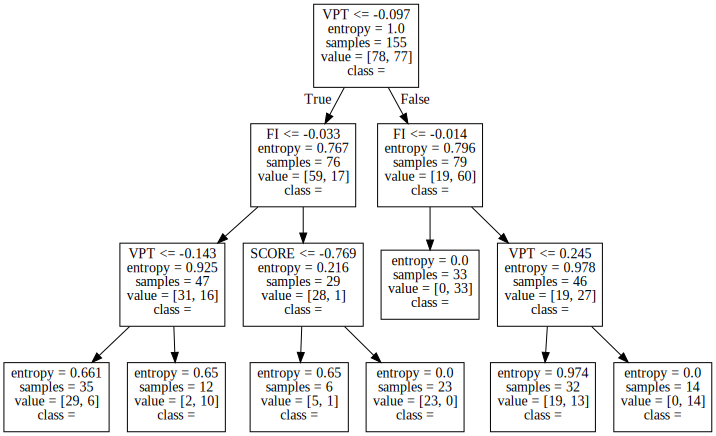

In [975]:
feature_name = ['ADI','CMF','OBV','ROC','RSI','WR','FI','VPT','SCORE']

import graphviz 
dot_data = tree.export_graphviz(clf

                        ,out_file = None ,feature_names=feature_name

                        ,class_names=['涨','跌']) 
graph = graphviz.Source(dot_data) 
graph

In [981]:
regressor = RandomForestClassifier(min_samples_leaf=6
                                   ,min_samples_split=2
                                   ,max_depth=5
                                   ,criterion='entropy'
                                   ,random_state=25)
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

0.8269230769230769

In [982]:
zoom_new['Randomforestcla']=regressor.predict(x_std)
zoom_new['Randomforestcla return']=1
for i in range(len(zoom_new['Decisiontreecla return'])):
    zoom_new.iloc[i,-1]=zoom_new.iloc[i-1,-1]*(zoom_new.iloc[i,-2]*zoom_new.iloc[i,10]+1)
zoom_new

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score,log return,signal,position,Decisiontreecla,Decisiontreecla return,Randomforestcla,Randomforestcla return
Date,,,,,,,,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,53.116401,-19.829420,3.079672e+06,-1.562896e+05,-0.052642,0.002929,1,0,-1,0.997071,-1,0.997071
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,53.116401,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970,-0.020118,1,1,-1,1.017130,1,0.977012
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251,0.060618,-1,0,-1,0.955474,-1,0.917788
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686,0.015686,1,1,-1,0.940487,1,0.932184
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183,-0.012265,1,1,1,0.928952,1,0.920751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740,-0.007156,-1,-1,-1,1.490635,-1,4.413191
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387,-0.039148,-1,-1,-1,1.548991,-1,4.585960
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261,0.047570,-1,-1,-1,1.475306,-1,4.367808


In [978]:
import numpy as np 
gini_thresholds = np.linspace(0,0.5,5)
parameters = {'criterion':("gini","entropy") 
              ,"max_depth":[*range(1,6)] 
              ,'min_samples_leaf':[*range(1,50,5)] }

rfc = RandomForestClassifier(random_state=25) 
GS = GridSearchCV(rfc, parameters, cv=10) 
GS.fit(x_train,y_train)
print(GS.best_params_)
GS.best_score_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6}


0.7745833333333334

In [749]:
## ExtraTreesClassifier

In [988]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(criterion='gini' ,max_depth=3,
    min_samples_split=6, random_state=25,min_samples_leaf=1)
etc.fit(x_train, y_train)
etc.score(x_test, y_test)

0.6153846153846154

In [989]:
zoom_new['ExtraTreescla']=etc.predict(x_std)
zoom_new['ExtraTreescla return']=1
for i in range(len(zoom_new['Decisiontreecla return'])):
    zoom_new.iloc[i,-1]=zoom_new.iloc[i-1,-1]*(zoom_new.iloc[i,-2]*zoom_new.iloc[i,10]+1)
zoom_new

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score,log return,signal,position,Decisiontreecla,Decisiontreecla return,Randomforestcla,Randomforestcla return,ExtraTreescla,ExtraTreescla return
Date,,,,,,,,,,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,53.116401,-19.829420,3.079672e+06,-1.562896e+05,-0.052642,0.002929,1,0,-1,0.997071,-1,0.997071,1,1.002929
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,53.116401,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970,-0.020118,1,1,-1,1.017130,1,0.977012,1,0.982752
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251,0.060618,-1,0,-1,0.955474,-1,0.917788,1,1.042324
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686,0.015686,1,1,-1,0.940487,1,0.932184,1,1.058674
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183,-0.012265,1,1,1,0.928952,1,0.920751,1,1.045690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740,-0.007156,-1,-1,-1,1.490635,-1,4.413191,1,17.697067
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387,-0.039148,-1,-1,-1,1.548991,-1,4.585960,-1,18.389876
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261,0.047570,-1,-1,-1,1.475306,-1,4.367808,-1,17.515077


In [990]:
cross_val_score(etc, x_train, y_train, cv=10).mean()

0.70875

In [985]:
import numpy as np 
gini_thresholds = np.linspace(0,0.5,5)
parameters = {'criterion':("gini","entropy") 
              ,"max_depth":[*range(1,6)] 
              ,'min_samples_leaf':[*range(1,50,5)]
             ,'min_samples_split':[*range(2,20,2)]}

rfc = ExtraTreesClassifier(random_state=25) 
GS = GridSearchCV(rfc, parameters, cv=10) 
GS.fit(x_train,y_train)
print(GS.best_params_)
GS.best_score_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 6}


0.70875

In [460]:
#knn

In [991]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

nca = NeighborhoodComponentsAnalysis(random_state=1)
knn = KNeighborsClassifier(n_neighbors=6)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(x_train, y_train)
print(nca_pipe.score(x_test, y_test))

0.6923076923076923


In [1007]:
nca = NeighborhoodComponentsAnalysis(random_state=1)
nca.fit(x_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))
knn.fit(nca.transform(x_train), y_train)
print(knn.score(nca.transform(x_test), y_test))

0.6538461538461539
0.75


In [1008]:
zoom_new['knn']=knn.predict(nca.transform(x_std))
zoom_new['knn return']=1
for i in range(len(zoom_new['knn'])):
    zoom_new.iloc[i,-1]=zoom_new.iloc[i-1,-1]*(zoom_new.iloc[i,-2]*zoom_new.iloc[i,10]+1)
zoom_new

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score,...,signal,position,Decisiontreecla,Decisiontreecla return,Randomforestcla,Randomforestcla return,ExtraTreescla,ExtraTreescla return,knn,knn return
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,53.116401,-19.829420,3.079672e+06,-1.562896e+05,-0.052642,...,1,0,-1,0.997071,-1,0.997071,1,1.002929,1,1.002929
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,53.116401,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970,...,1,1,-1,1.017130,1,0.977012,1,0.982752,1,0.982752
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251,...,-1,0,-1,0.955474,-1,0.917788,1,1.042324,-1,0.923180
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686,...,1,1,-1,0.940487,1,0.932184,1,1.058674,1,0.937661
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183,...,1,1,1,0.928952,1,0.920751,1,1.045690,1,0.926161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740,...,-1,-1,-1,1.490635,-1,4.413191,1,17.697067,-1,2.205184
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387,...,-1,-1,-1,1.548991,-1,4.585960,-1,18.389876,-1,2.291513
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261,...,-1,-1,-1,1.475306,-1,4.367808,-1,17.515077,-1,2.182506


In [ ]:
#nca cross

In [1003]:
nca = cross_val_score(nca_pipe, x_train, y_train, cv=10) 
print(nca.mean())

0.6320833333333333


In [1004]:
#knn cross

In [1005]:
knn = cross_val_score(knn, x_train, y_train, cv=10) 
print(knn.mean())

0.6429166666666666


In [1006]:
#svm

In [1016]:
from sklearn.svm import SVC
svc = SVC(C=3,kernel='linear',gamma='auto')
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.7884615384615384

In [1017]:
cross_val_score(svc, x_train, y_train, cv=10).mean()

0.7854166666666667

In [1018]:
zoom_new['SVM']=svc.predict(x_std)
zoom_new['SVM return']=1
for i in range(len(zoom_new['SVM return'])):
    zoom_new.iloc[i,-1]=zoom_new.iloc[i-1,-1]*(zoom_new.iloc[i,-2]*zoom_new.iloc[i,10]+1)
zoom_new

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score,...,Decisiontreecla,Decisiontreecla return,Randomforestcla,Randomforestcla return,ExtraTreescla,ExtraTreescla return,knn,knn return,SVM,SVM return
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,53.116401,-19.829420,3.079672e+06,-1.562896e+05,-0.052642,...,-1,0.997071,-1,0.997071,1,1.002929,1,1.002929,-1,0.997071
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,53.116401,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970,...,-1,1.017130,1,0.977012,1,0.982752,1,0.982752,-1,1.017130
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251,...,-1,0.955474,-1,0.917788,1,1.042324,-1,0.923180,-1,0.955474
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686,...,-1,0.940487,1,0.932184,1,1.058674,1,0.937661,1,0.970462
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183,...,1,0.928952,1,0.920751,1,1.045690,1,0.926161,1,0.958560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740,...,-1,1.490635,-1,4.413191,1,17.697067,-1,2.205184,-1,0.818039
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387,...,-1,1.548991,-1,4.585960,-1,18.389876,-1,2.291513,-1,0.850064
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261,...,-1,1.475306,-1,4.367808,-1,17.515077,-1,2.182506,-1,0.809627


In [1019]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train,y_train)
acc_score = gnb.score(x_test,y_test)
acc_score

0.5192307692307693

In [1022]:
zoom_new['GaussianNB']=gnb.predict(x_std)
zoom_new['GaussianNB return']=1
for i in range(len(zoom_new['GaussianNB return'])):
    zoom_new.iloc[i,-1]=zoom_new.iloc[i-1,-1]*(zoom_new.iloc[i,-2]*zoom_new.iloc[i,10]+1)
zoom_new

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score,...,Randomforestcla,Randomforestcla return,ExtraTreescla,ExtraTreescla return,knn,knn return,SVM,SVM return,GaussianNB,GaussianNB return
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,53.116401,-19.829420,3.079672e+06,-1.562896e+05,-0.052642,...,-1,0.997071,1,1.002929,1,1.002929,-1,0.997071,1,1.002929
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,53.116401,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970,...,1,0.977012,1,0.982752,1,0.982752,-1,1.017130,-1,1.023106
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251,...,-1,0.917788,1,1.042324,-1,0.923180,-1,0.955474,1,1.085124
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686,...,1,0.932184,1,1.058674,1,0.937661,1,0.970462,1,1.102146
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183,...,1,0.920751,1,1.045690,1,0.926161,1,0.958560,1,1.088628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740,...,-1,4.413191,1,17.697067,-1,2.205184,-1,0.818039,1,5.778006
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387,...,-1,4.585960,-1,18.389876,-1,2.291513,-1,0.850064,1,5.551808
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261,...,-1,4.367808,-1,17.515077,-1,2.182506,-1,0.809627,1,5.815905


In [1020]:
y_pred = gnb.predict(x_test)

In [1021]:
from sklearn.metrics import confusion_matrix as CM 
CM(y_test,y_pred)

array([[13,  6],
       [19, 14]])

xgboost

In [1023]:
from xgboost import XGBRegressor as XGBR 
from sklearn.ensemble import RandomForestRegressor as RFR 
from sklearn.linear_model import LinearRegression as LinearR 
from sklearn.datasets import load_boston 
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS 
from sklearn.metrics import mean_squared_error as MSE

In [1029]:
reg = XGBR(n_estimators=100,random_state=25,objective ='reg:squarederror',reg_alpha=0.1,reg_lambda=0.35,scoring = "neg_mean_squared_error").fit(x_train,y_train) 
reg.score(x_test,y_test)
#reg.feature_importances_

0.3047407417665505

In [1030]:
MSE(y_test,reg.predict(x_test))

0.644863246911794

In [1031]:
import xgboost as xgb
dtrain = xgb.DMatrix(x_train,y_train) 
dtest = xgb.DMatrix(x_test,y_test)
param = {'silent':False,'objective':'reg:linear',"eta":0.1} 
num_round = 180 
bst = xgb.train(param, dtrain, num_round) 
from sklearn.metrics import r2_score 
print(r2_score(y_test,bst.predict(dtest)))
MSE(y_test,bst.predict(dtest))

[11:59:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.2982871261996375


0.6508490708177918

In [1032]:
CVS(reg,x_train,y_train,cv=12).mean()

0.3433292360828697

In [1028]:
from sklearn.model_selection import GridSearchCV
param = {"reg_alpha":np.arange(0,5,0.05),"reg_lambda":np.arange(0,2,0.05)}
gscv = GridSearchCV(reg,param_grid = param,scoring = "neg_mean_squared_error")
gscv.fit(x_train,y_train)
print(gscv.best_params_)
gscv.best_score_

{'reg_alpha': 0.1, 'reg_lambda': 0.35000000000000003}


-0.5822137335234411

In [1033]:
zoom_new['xgboost']=reg.predict(x_std)
zoom_new['xgboost return']=1
for i in range(len(zoom_new['xgboost return'])):
    zoom_new.iloc[i,-1]=zoom_new.iloc[i-1,-1]*(zoom_new.iloc[i,-2]*zoom_new.iloc[i,10]+1)
zoom_new

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score,...,ExtraTreescla,ExtraTreescla return,knn,knn return,SVM,SVM return,GaussianNB,GaussianNB return,xgboost,xgboost return
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,53.116401,-19.829420,3.079672e+06,-1.562896e+05,-0.052642,...,1,1.002929,1,1.002929,-1,0.997071,1,1.002929,0.858731,1.002515
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,53.116401,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970,...,1,0.982752,1,0.982752,-1,1.017130,-1,1.023106,0.797622,0.986428
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251,...,1,1.042324,-1,0.923180,-1,0.955474,1,1.085124,-0.962755,0.928860
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686,...,1,1.058674,1,0.937661,1,0.970462,1,1.102146,0.883845,0.941738
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183,...,1,1.045690,1,0.926161,1,0.958560,1,1.088628,0.777268,0.932760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740,...,1,17.697067,-1,2.205184,-1,0.818039,1,5.778006,-0.625999,2.031206
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387,...,-1,18.389876,-1,2.291513,-1,0.850064,1,5.551808,-0.667345,2.084272
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261,...,-1,17.515077,-1,2.182506,-1,0.809627,1,5.815905,-1.033674,1.981785


In [1034]:
def plot_learning_curve(estimator,title, X, y,

    ax=None, ylim=None, cv=None,  n_jobs=None):

    from sklearn.model_selection import learning_curve 
    import matplotlib.pyplot as plt 
    import numpy as np

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y ,shuffle=True ,cv=cv  ,random_state=420 ,n_jobs=n_jobs) 
    if ax == None:
        ax = plt.gca() 
    else:
        ax = plt.figure() 
    ax.set_title(title) 
    if ylim is not None:
        ax.set_ylim(*ylim) 
    ax.set_xlabel("Training examples") 
    ax.set_ylabel("Score") 
    ax.grid()
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",label="Training score")

    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",label="Test score")

    ax.legend(loc="best") 
    return ax

[12:01:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

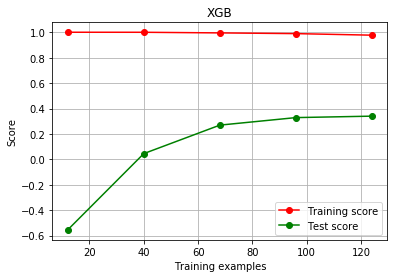

In [1035]:
cv = KFold(n_splits=5, shuffle = True, random_state=42) 
plot_learning_curve(XGBR(n_estimators=100,random_state=42) ,"XGB",x_train,y_train,ax=None,cv=cv) 
plt.show()

In [1036]:
zoom_new['Momentum return']=1
for i in range(len(zoom_new['Momentum return'])):
    zoom_new.iloc[i,-1]=zoom_new.iloc[i-1,-1]*(zoom_new.iloc[i,12]*zoom_new.iloc[i,10]+1)
zoom_new

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score,...,ExtraTreescla return,knn,knn return,SVM,SVM return,GaussianNB,GaussianNB return,xgboost,xgboost return,Momentum return
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,53.116401,-19.829420,3.079672e+06,-1.562896e+05,-0.052642,...,1.002929,1,1.002929,-1,0.997071,1,1.002929,0.858731,1.002515,1.000000
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,53.116401,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970,...,0.982752,1,0.982752,-1,1.017130,-1,1.023106,0.797622,0.986428,0.979882
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251,...,1.042324,-1,0.923180,-1,0.955474,1,1.085124,-0.962755,0.928860,0.979882
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686,...,1.058674,1,0.937661,1,0.970462,1,1.102146,0.883845,0.941738,0.995252
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183,...,1.045690,1,0.926161,1,0.958560,1,1.088628,0.777268,0.932760,0.983046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740,...,17.697067,-1,2.205184,-1,0.818039,1,5.778006,-0.625999,2.031206,2.151446
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387,...,18.389876,-1,2.291513,-1,0.850064,1,5.551808,-0.667345,2.084272,2.235672
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261,...,17.515077,-1,2.182506,-1,0.809627,1,5.815905,-1.033674,1.981785,2.129322


In [1039]:
from sklearn.ensemble import GradientBoostingClassifier
 
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc.score(x_test,y_test)

0.7884615384615384

In [1040]:
zoom_new['GBDT']=reg.predict(x_std)
zoom_new['GBDT return']=1
for i in range(len(zoom_new['GBDT return'])):
    zoom_new.iloc[i,-1]=zoom_new.iloc[i-1,-1]*(zoom_new.iloc[i,-2]*zoom_new.iloc[i,10]+1)
zoom_new

,Adj Close,ADI,CMF,OBV,ROC,RSI,WR,FI,VPT,score,...,knn return,SVM,SVM return,GaussianNB,GaussianNB return,xgboost,xgboost return,Momentum return,GBDT,GBDT return
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,86.860001,3.214253e+06,0.603412,5326800,0.374905,53.116401,-19.829420,3.079672e+06,-1.562896e+05,-0.052642,...,1.002929,-1,0.997071,1,1.002929,0.858731,1.002515,1.000000,0.858731,1.002515
2019-07-02,85.129997,2.827955e+06,0.393165,3460800,-1.991715,53.116401,-60.350952,-3.228186e+06,-2.295267e+05,-0.036970,...,0.982752,-1,1.017130,-1,1.023106,0.797622,0.986428,0.979882,0.797622,0.986428
2019-07-03,90.449997,5.400748e+06,0.545591,6166900,6.249266,80.392866,-2.463081,1.439645e+07,1.319460e+05,-0.061251,...,0.923180,-1,0.955474,1,1.085124,-0.962755,0.928860,0.979882,-0.962755,0.928860
2019-07-05,91.879997,7.866344e+06,0.630235,8749600,1.580984,84.778546,-2.267102,3.693262e+06,2.099435e+05,0.015686,...,0.937661,1,0.970462,1,1.102146,0.883845,0.941738,0.995252,0.883845,0.941738
2019-07-08,90.760002,7.149026e+06,0.500811,6956300,-1.218976,68.725440,-69.999921,-2.008487e+06,1.897219e+04,-0.015183,...,0.926161,1,0.958560,1,1.088628,0.777268,0.932760,0.983046,0.777268,0.932760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,148.990005,7.933929e+07,0.057603,97114000,-0.713043,71.387123,-89.089721,-1.200392e+07,-9.507230e+04,-0.017740,...,2.205184,-1,0.818039,1,5.778006,-0.625999,2.031206,2.151446,-0.625999,2.031206
2020-04-21,143.270004,7.544736e+07,-0.005709,87404900,-3.839185,47.944065,-70.042686,-5.553606e+07,-4.527444e+05,-0.029387,...,2.291513,-1,0.850064,1,5.551808,-0.667345,2.084272,2.235672,-0.667345,2.084272
2020-04-22,150.250000,7.829481e+07,0.069817,93957700,4.871917,66.072057,-28.272992,4.573852e+07,-5.350329e+04,-0.013261,...,2.182506,-1,0.809627,1,5.815905,-1.033674,1.981785,2.129322,-1.033674,1.981785


In [1037]:
zoom_new.columns

Index(['Adj Close', 'ADI', 'CMF', 'OBV', 'ROC', 'RSI', 'WR', 'FI', 'VPT',
       'score', 'log return', 'signal', 'position', 'Decisiontreecla',
       'Decisiontreecla return', 'Randomforestcla', 'Randomforestcla return',
       'ExtraTreescla', 'ExtraTreescla return', 'knn', 'knn return', 'SVM',
       'SVM return', 'GaussianNB', 'GaussianNB return', 'xgboost',
       'xgboost return', 'Momentum return'],
      dtype='object')

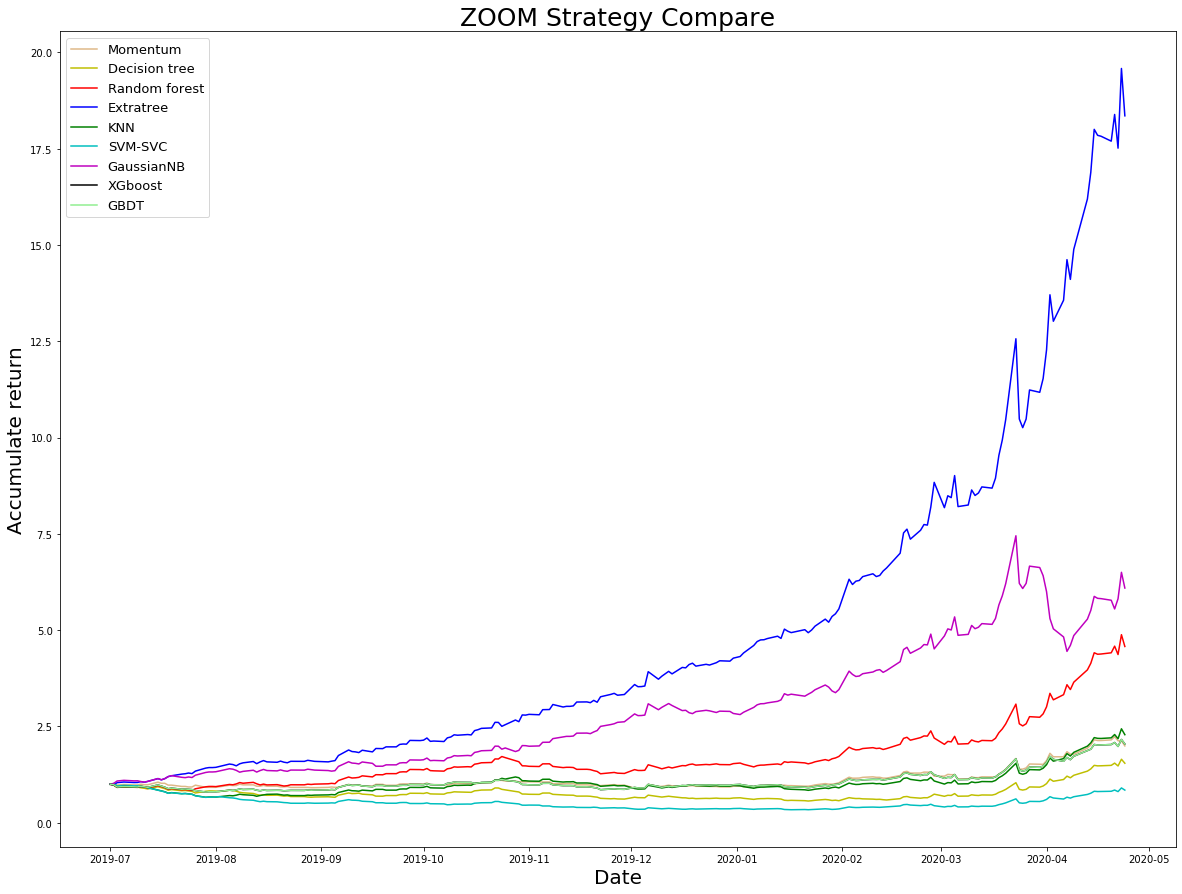

In [1041]:
plt.figure(figsize=(20, 15))
plt.plot(zoom_new['Momentum return'],  c='#DEB887')   
plt.plot(zoom_new['Decisiontreecla return'], 'y')
plt.plot(zoom_new['Randomforestcla return'],  'r')
plt.plot(zoom_new['ExtraTreescla return'],  'b')
plt.plot(zoom_new['knn return'],  'g')
plt.plot(zoom_new['SVM return'],  'c')
plt.plot(zoom_new['GaussianNB return'],  'm')
plt.plot(zoom_new['xgboost return'],  'k') 
plt.plot(zoom_new['GBDT return'],  c='#90EE90')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Accumulate return', fontsize=20)
plt.title('ZOOM Strategy Compare', fontsize=25)
plt.legend(('Momentum','Decision tree','Random forest','Extratree','KNN','SVM-SVC','GaussianNB','XGboost','GBDT'), fontsize=13, loc='upper left')
plt.show()

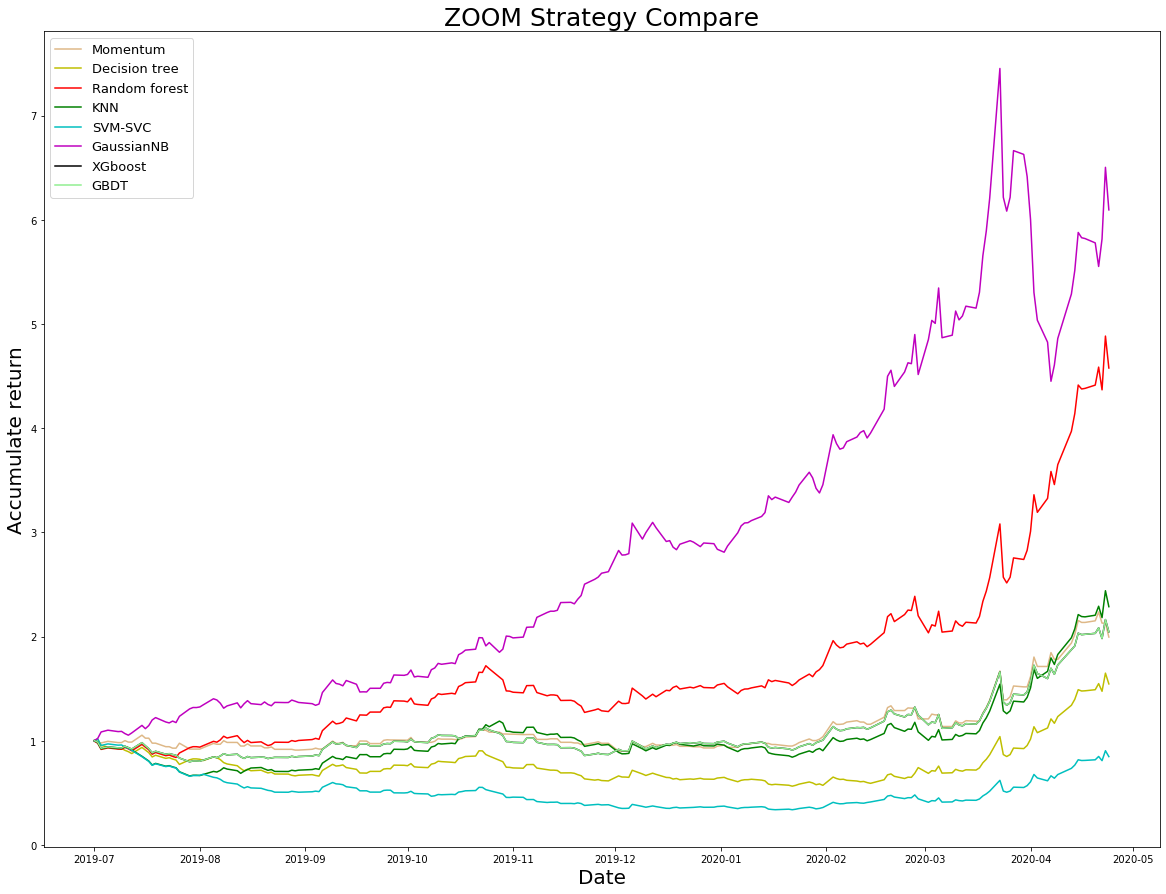

In [1045]:
plt.figure(figsize=(20, 15))
plt.plot(zoom_new['Momentum return'],  c='#DEB887')   
plt.plot(zoom_new['Decisiontreecla return'], 'y')
plt.plot(zoom_new['Randomforestcla return'],  'r')
plt.plot(zoom_new['knn return'],  'g')
plt.plot(zoom_new['SVM return'],  'c')
plt.plot(zoom_new['GaussianNB return'],  'm')
plt.plot(zoom_new['xgboost return'],  'k') 
plt.plot(zoom_new['GBDT return'],  c='#90EE90')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Accumulate return', fontsize=20)
plt.title('ZOOM Strategy Compare', fontsize=25)
plt.legend(('Momentum','Decision tree','Random forest','KNN','SVM-SVC','GaussianNB','XGboost','GBDT'), fontsize=13, loc='upper left')
plt.show()